# Library

In [1]:
# Manipulasi dan analisis data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulasi waktu
import datetime

# Statistik untuk A/B Testing
from scipy.stats import ttest_ind

# Konfigurasi tampilan grafik
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


# Data Understanding & Penentuan Goals

### Dataset - Seoul Bike

In [2]:
seoulbike = pd.read_csv("/content/SeoulBikeData.csv", encoding='latin1')

#### shape dataset - seoul bike

In [3]:
seoulbike.shape

(8760, 14)




> shape dataset seoul bike, baris = 8760, kolom = 14 kolom



#### info dataset - seoul bike

In [4]:
# Cek dimensi dataset dan info struktur data
seoulbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec



> Tidak ada data yang hilang (non-null)


> datatype: float64 (6), int64(4), object (4)

Notes: perlu peninjauan kembali terkait data date - tercatat datatype nya ialah object --> perlu diganti menjadi datetime





In [5]:
seoulbike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#### Data Description

* Date - The date of each observation in the format 'year-month-day'

* Hour - Hour of the day

* Temperature - Temperature recorded in the city in Celsius (°C).

* Humidity - Relative humidity in %

* Wind speed - Speed of the wind in m/s

* Visibility - measure of distance at which object or light can be clearly discerned in units of 10m

* Dew point temperature - Temperature recorded in the beginning of the day in Celsius(°C).

* Solar radiation - Intensity of sunlight in MJ/m^2

* Rainfall - Amount of rainfall received in mm

* Snowfall - Amount of snowfall received in cm

* Seasons - Season of the year (Winter, Spring, Summer, Autumn)

* Holiday - Whether the day is a Holiday or not (Holiday/No holiday)

* Functional Day -Whether the rental service is available (Yes-Functional hours) or not (No-Non functional hours)

# Data Cleaning

In [6]:
# Rename kolom agar lebih mudah digunakan
seoulbike.columns = seoulbike.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '_')

In [7]:
# Ubah kolom Date menjadi datetime
seoulbike['Date'] = pd.to_datetime(seoulbike['Date'], format='%d/%m/%Y')
seoulbike['Date']

,Date
0,2017-12-01
1,2017-12-01
2,2017-12-01
3,2017-12-01
4,2017-12-01
...,...
8755,2018-11-30
8756,2018-11-30
8757,2018-11-30
8758,2018-11-30


In [8]:
#check datatype date
seoulbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   Rented_Bike_Count        8760 non-null   int64         
 2   Hour                     8760 non-null   int64         
 3   Temperature°C            8760 non-null   float64       
 4   Humidity%                8760 non-null   int64         
 5   Wind_speed_m_s           8760 non-null   float64       
 6   Visibility_10m           8760 non-null   int64         
 7   Dew_point_temperature°C  8760 non-null   float64       
 8   Solar_Radiation_MJ_m2    8760 non-null   float64       
 9   Rainfallmm               8760 non-null   float64       
 10  Snowfall_cm              8760 non-null   float64       
 11  Seasons                  8760 non-null   object        
 12  Holiday                  8760 non-



> Datatype date sudah diubah dari object menjadi datetime64



In [9]:
# Cek missing values
seoulbike.isnull().sum().reset_index(name='missing_count')

,index,missing_count
0,Date,0
1,Rented_Bike_Count,0
2,Hour,0
3,Temperature°C,0
4,Humidity%,0
5,Wind_speed_m_s,0
6,Visibility_10m,0
7,Dew_point_temperature°C,0
8,Solar_Radiation_MJ_m2,0
9,Rainfallmm,0




> tidak ada missing value



In [10]:
seoulbike[seoulbike.duplicated()]

,Date,Rented_Bike_Count,Hour,Temperature°C,Humidity%,Wind_speed_m_s,Visibility_10m,Dew_point_temperature°C,Solar_Radiation_MJ_m2,Rainfallmm,Snowfall_cm,Seasons,Holiday,Functioning_Day




> Tidak ada duplicate data



In [11]:
seoulbike.isna().sum()

,0
Date,0
Rented_Bike_Count,0
Hour,0
Temperature°C,0
Humidity%,0
Wind_speed_m_s,0
Visibility_10m,0
Dew_point_temperature°C,0
Solar_Radiation_MJ_m2,0
Rainfallmm,0




> tidak ada NaN



# Correlation Between Data - Heatmap - Encoding - Trial

In [12]:
from sklearn.preprocessing import LabelEncoder

# Kolom-kolom yang ingin di-label encode
columns_to_encode = ['Seasons', 'Holiday', 'Functioning_Day']

# Inisialisasi LabelEncoder
labelEncoder = LabelEncoder()

In [13]:
# Menerapkan label encoding ke data pelatihan (train)
# Make sure data_churn is defined and holds the dataframe
seoul_bike_encode = seoulbike.copy()  # Assuming df_churn is the original DataFrame

for col in columns_to_encode:
    seoul_bike_encode[col] = labelEncoder.fit_transform(seoul_bike_encode[col])
#fit dilakukan di data train dan implementasikan ke train, kemudian lakukan transform ke data test. Untuk mencegah data leakage

In [14]:
seoul_bike_encode

,Date,Rented_Bike_Count,Hour,Temperature°C,Humidity%,Wind_speed_m_s,Visibility_10m,Dew_point_temperature°C,Solar_Radiation_MJ_m2,Rainfallmm,Snowfall_cm,Seasons,Holiday,Functioning_Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1


## heatmap - encoding seoul bike data

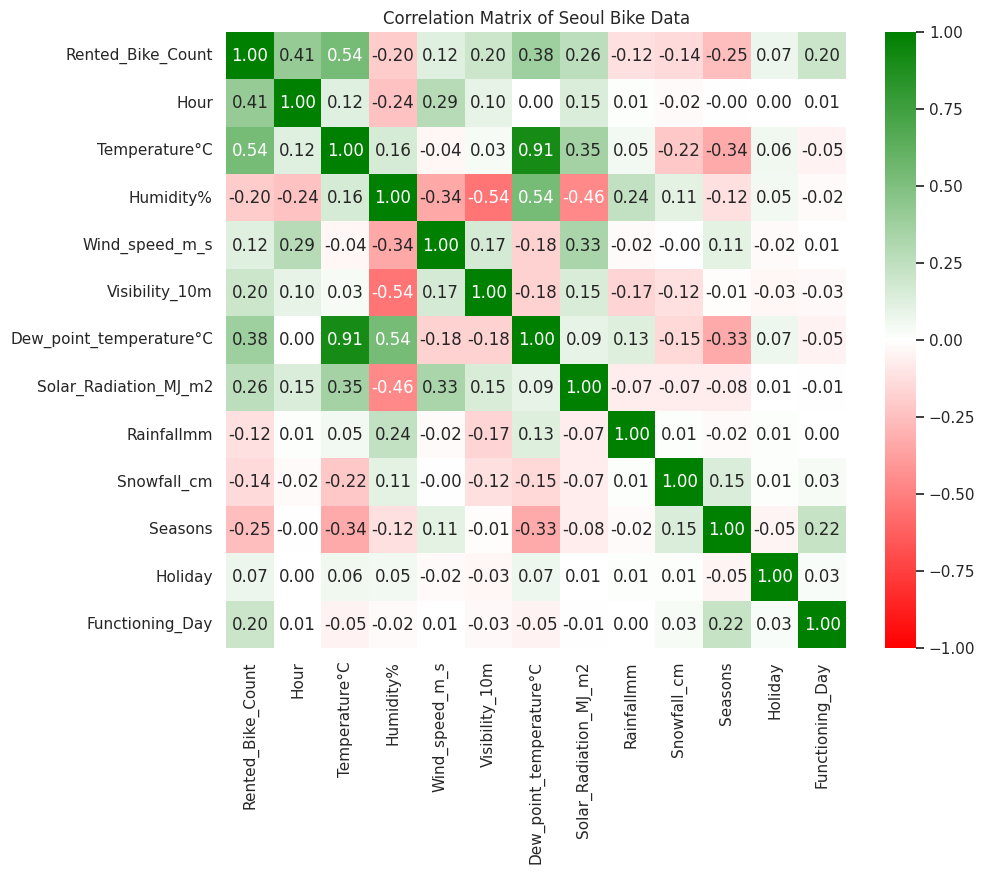

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Pilih kolom numerik
numeric_columns = seoul_bike_encode.select_dtypes(include='number').columns

# Hitung matriks korelasi
correlation_matrix = seoul_bike_encode[numeric_columns].corr()

# Definisikan custom colormap (merah -> putih -> biru/hijau)
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_cmap",
    ["red", "white", "green"]  # merah utk negatif, putih utk 0, hijau utk positif
)

# Plot heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    center=0,          # pastikan 0 jadi titik tengah warna
    vmin=-1, vmax=1    # skala tetap -1 sampai 1
)

plt.title('Correlation Matrix of Seoul Bike Data')
plt.show()


### Insight - Heatmap (correlation between data)

1. Faktor yang Positif Berkorelasi dengan Jumlah Sepeda yang Disewa (Rented_Bike_Count)

  * Temperature (0.54) → Semakin hangat, semakin banyak sepeda yang disewa.

  * Dew point temperature (0.38) → Udara yang lembap tapi hangat mendukung aktivitas luar.

  * Hour (0.41) → Ada korelasi waktu terhadap peminjaman sepeda.

2. Faktor Negatif Berkorelasi dengan Penyewaan

  * Humidity (-0.20) → Kelembaban tinggi mengurangi minat menyewa sepeda.

  * Rainfall (-0.12) dan Snowfall (-0.14) → Cuaca buruk menurunkan penyewaan.

  * Seasons (-0.25) → Mungkin musim dingin (winter) berdampak negatif terhadap penyewaan.

  * Visibility (-0.12) → Visibilitas buruk membuat orang enggan bersepeda.

3. Korelasi Kuat Antara Variabel Lain (Potensi Multikolinearitas)

  * Temperature dan Dew_point_temperature → 0.91

  * Temperature dan Solar_Radiation → 0.35

  * Wind_speed dan Humidity → -0.34 (angin kencang menurunkan kelembaban)

### Bisnis Question From Heatmap Insight

1. Waktu & Musim

  * Kapan waktu dan musim terbaik untuk meningkatkan promosi penyewaan sepeda?

  * Bagaimana pola penyewaan sepeda per jam dalam sehari?

2. Strategi Cuaca

  * Bagaimana strategi promosi dapat disesuaikan saat cuaca buruk (hujan/salju)?

  * Apakah perlu layanan atau promo khusus saat cuaca mendukung (misalnya saat cerah dan suhu nyaman)?

3. fisiensi Operasional

  * Apakah mungkin mengatur distribusi sepeda berdasarkan musim dan cuaca agar lebih efisien?

  * Bisakah sistem prediksi permintaan dibangun berdasarkan cuaca harian?

4. Kebijakan & Hari Libur

  * *Mengapa korelasi dengan variabel Holiday rendah (0.07)? Apakah orang tetap menggunakan sepeda saat hari libur?* -- study kasus yang akan diambil

  * Apa dampak Functioning Day terhadap penggunaan sepeda?

5. Peluang Penyesuaian Produk

  * Bisakah menambahkan layanan seperti pelindung hujan atau ban salju untuk meningkatkan penyewaan di cuaca ekstrem?

### EDA1: rent bike count on holiday vs workday

##### Boxplot: Jumlah Sepeda Disewa vs Hari Kerja/Libur

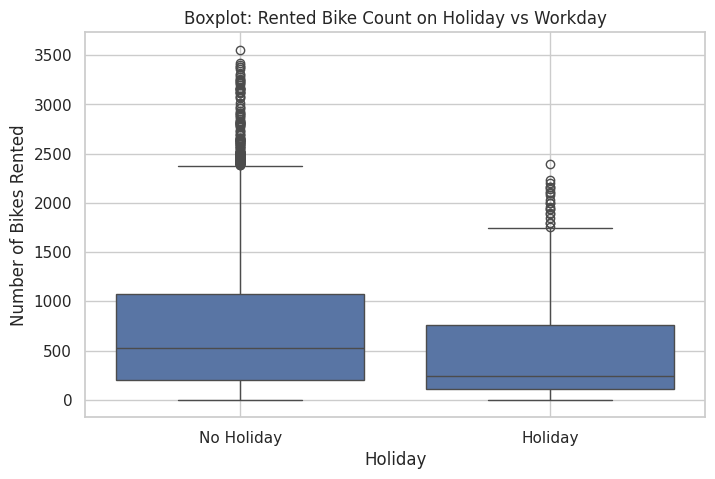

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Holiday', y='Rented_Bike_Count', data=seoulbike)
plt.title('Boxplot: Rented Bike Count on Holiday vs Workday')
plt.xlabel('Holiday')
plt.ylabel('Number of Bikes Rented')
plt.grid(True)
plt.show()

**Insight:**

1. Median Penyewaan Lebih Tinggi pada Hari Biasa
* Median (garis tengah di box) penyewaan sepeda pada No Holiday (hari kerja) lebih tinggi dibandingkan saat Holiday.
* Ini menunjukkan bahwa secara umum, lebih banyak sepeda disewa saat hari kerja.

📈 2. Sebaran Data Lebih Luas pada Hari Kerja
* Rentang interkuartil (IQR) dan panjang whisker pada No Holiday lebih besar, menunjukkan variasi penyewaan lebih tinggi di hari kerja.

* Mungkin karena mobilitas orang lebih tinggi (berangkat kerja/sekolah).

⚠️ 3. Outlier Lebih Banyak dan Ekstrem di Hari Kerja
* Banyak titik outlier (penyewaan ekstrem) di hari kerja, bahkan melebihi 3000 sepeda per hari.

* Artinya, hari kerja lebih berpotensi menghasilkan lonjakan permintaan.

❄️ 4. Hari Libur Lebih Konsisten dan Rendah
* Pada hari libur, jumlah penyewaan cenderung lebih rendah dan lebih stabil.

* Ini bisa disebabkan oleh:

  * Orang lebih banyak beristirahat di rumah.

  * Aktivitas commuting berkurang.
  

##### Distribution Plot (Histogram dengan KDE)

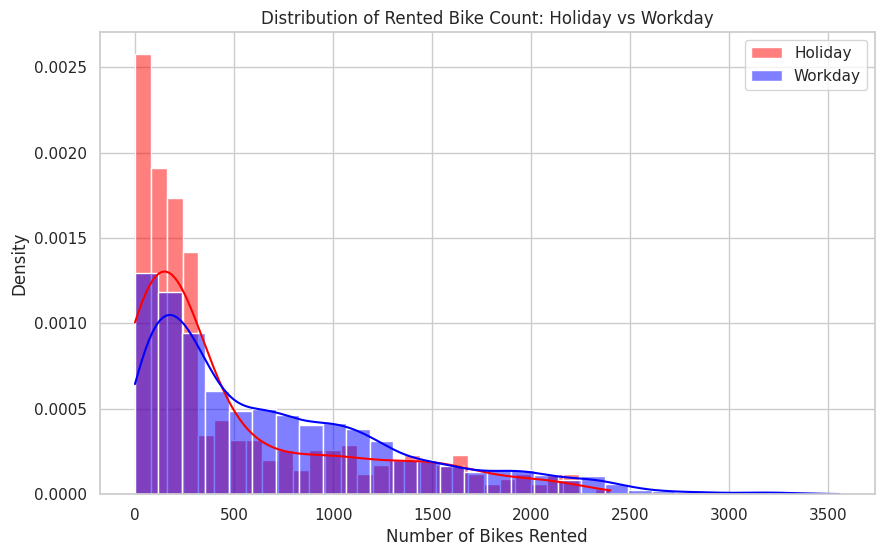

In [17]:
plt.figure(figsize=(10, 6))

# Filter berdasarkan Holiday
sns.histplot(seoulbike[seoulbike['Holiday'] == 'Holiday']['Rented_Bike_Count'],
             kde=True, color='red', label='Holiday', stat='density', bins=30)
sns.histplot(seoulbike[seoulbike['Holiday'] == 'No Holiday']['Rented_Bike_Count'],
             kde=True, color='blue', label='Workday', stat='density', bins=30)

plt.title('Distribution of Rented Bike Count: Holiday vs Workday')
plt.xlabel('Number of Bikes Rented')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


Insights from histplot:
1. Distribusi Jumlah Sewa di Hari Libur Lebih Condong ke Kiri (Left-Skewed)
* Kurva berwarna merah (Holiday) menunjukkan puncak tinggi pada jumlah sewa < 200 sepeda.

* Ini berarti mayoritas penyewaan pada hari libur rendah, dan cepat menurun setelah melewati 400.

📈 2. Distribusi Hari Kerja Lebih Rata dan Panjang (Right-Tailed)
* Kurva biru (Workday) terlihat lebih menyebar ke kanan (hingga >3000 sepeda).

* Menandakan bahwa pada hari kerja:

  * Lebih banyak penyewaan sepeda dalam jumlah tinggi.

  * Variasi penggunaan lebih luas dibanding hari libur.

🔄 3. Overlap Menunjukkan Adanya Rentang Nilai Serupa
* Meski berbeda pola, keduanya tetap memiliki overlap pada kisaran rendah (0–400).

* Artinya: Ada penggunaan sepeda yang konsisten baik hari kerja maupun hari libur, namun skalanya berbeda.

📉 4. Densitas Tertinggi:
* Hari libur: Densitas tertinggi sekitar 100–200 sepeda.

* Hari kerja: Densitas lebih menyebar dan cenderung ke arah 300–600 sepeda dan naik lagi di >1000.

* Ini memperkuat bahwa workday memiliki lebih banyak permintaan sepeda secara umum.


# Data Manipulation

In [18]:
# Tambahkan kolom hari
seoulbike['DayOfWeek'] = seoulbike['Date'].dt.day_name()
seoulbike['IsWeekend'] = seoulbike['DayOfWeek'].isin(['Saturday', 'Sunday'])

# Buat kolom IsHoliday
seoulbike['IsHoliday'] = seoulbike['Holiday'].apply(lambda x: True if x != 'No Holiday' else False)


In [19]:
seoulbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   Rented_Bike_Count        8760 non-null   int64         
 2   Hour                     8760 non-null   int64         
 3   Temperature°C            8760 non-null   float64       
 4   Humidity%                8760 non-null   int64         
 5   Wind_speed_m_s           8760 non-null   float64       
 6   Visibility_10m           8760 non-null   int64         
 7   Dew_point_temperature°C  8760 non-null   float64       
 8   Solar_Radiation_MJ_m2    8760 non-null   float64       
 9   Rainfallmm               8760 non-null   float64       
 10  Snowfall_cm              8760 non-null   float64       
 11  Seasons                  8760 non-null   object        
 12  Holiday                  8760 non-

In [20]:
seoulbike.shape

(8760, 17)



> jumlah kolom dalam dataset bertambah 3, semula 14 menjadi 17



Range Data

In [21]:
print("📆 Tanggal Terlama :", seoulbike['Date'].min())
print("📆 Tanggal Terbaru :", seoulbike['Date'].max())

📆 Tanggal Terlama : 2017-12-01 00:00:00
📆 Tanggal Terbaru : 2018-11-30 00:00:00


# EDA (Exploratory Data Analysis)

## average bike rentals: holiday vs non-holiday

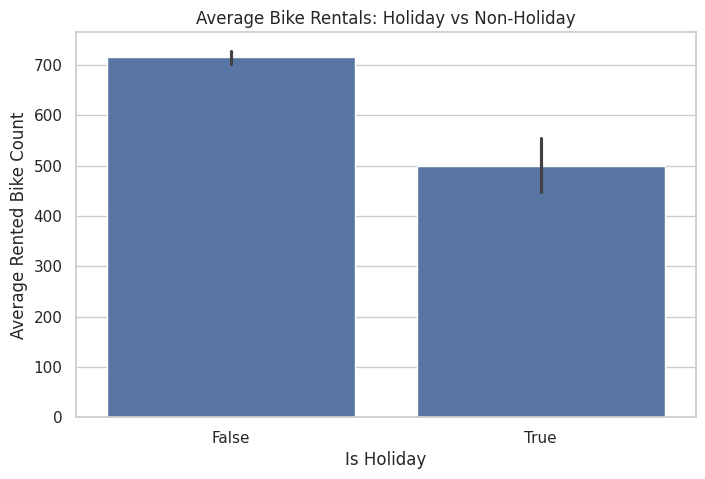

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Perbandingan rata-rata rental antara hari libur dan hari kerja
plt.figure(figsize=(8,5))
sns.barplot(data=seoulbike, x='IsHoliday', y='Rented_Bike_Count')
plt.title('Average Bike Rentals: Holiday vs Non-Holiday')
plt.ylabel('Average Rented Bike Count')
plt.xlabel('Is Holiday')
plt.show()

Rata-rata jumlah sepeda yang disewa lebih tinggi pada hari biasa dibandingkan hari libur. Ini menunjukkan bahwa sepeda lebih banyak digunakan untuk aktivitas rutin seperti bekerja atau sekolah.

## hourly rental trends: holiday vs non-holiday

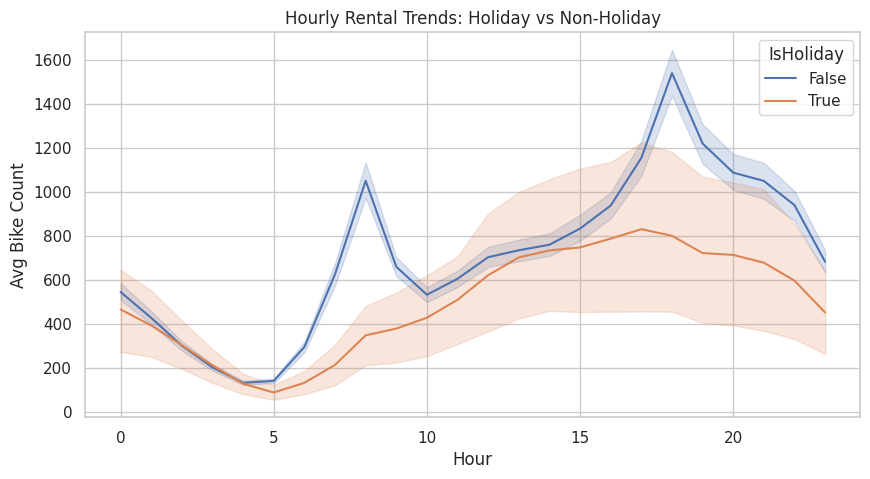

In [23]:
# Rata-rata per jam
plt.figure(figsize=(10,5))
sns.lineplot(data=seoulbike, x='Hour', y='Rented_Bike_Count', hue='IsHoliday')
plt.title('Hourly Rental Trends: Holiday vs Non-Holiday')
plt.ylabel('Avg Bike Count')
plt.show()

Pada hari biasa, jumlah penyewaan sepeda memuncak di jam berangkat (sekitar pukul 8) dan pulang kerja (sekitar pukul 17–18), sedangkan pada hari libur tren penyewaan lebih merata sepanjang hari dengan puncak lebih kecil. Hal ini mengindikasikan penggunaan sepeda yang lebih terkait aktivitas rutin pada hari kerja.

## daily total rentals overtime

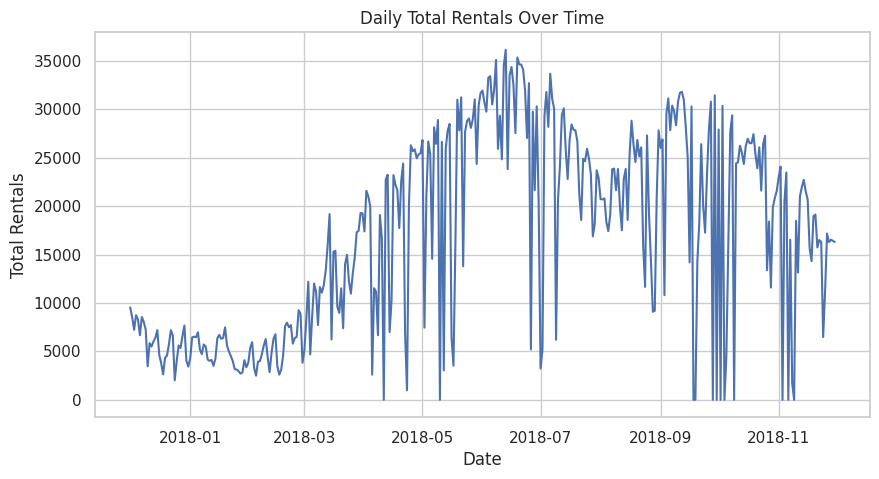

In [24]:
daily_rentals = seoulbike.groupby('Date')['Rented_Bike_Count'].sum().reset_index()

sns.lineplot(data=daily_rentals, x='Date', y='Rented_Bike_Count')
plt.title('Daily Total Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.show()

Jumlah penyewaan sepeda harian meningkat signifikan mulai Maret hingga puncaknya sekitar Juni-Juli 2018, lalu menurun menjelang akhir tahun. Pola ini menunjukkan adanya pengaruh musim terhadap aktivitas penyewaan sepeda.

## heatmap: average bike rentals by hour and day of week

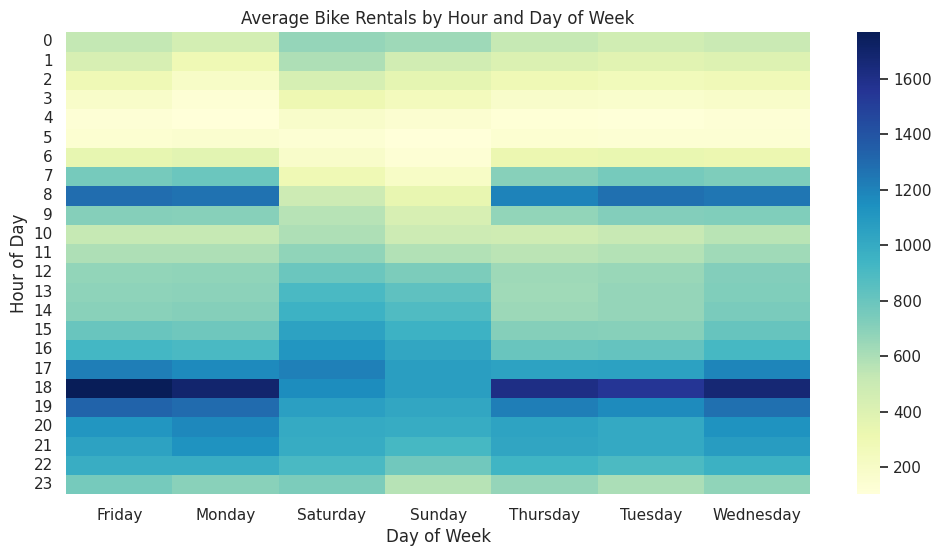

In [25]:
pivot_table = seoulbike.pivot_table(index='Hour', columns='DayOfWeek', values='Rented_Bike_Count', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=False, cmap='YlGnBu')
plt.title('Average Bike Rentals by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()


Penyewaan sepeda paling tinggi terjadi pada pukul 8 pagi dan 5–6 sore di hari kerja, mencerminkan pola perjalanan kerja. Sementara itu, pada akhir pekan, penyewaan lebih merata sepanjang hari tanpa lonjakan tajam.

# A/B Testing

Tujuan A/B Testing:
Menguji apakah terdapat perbedaan signifikan jumlah peminjaman sepeda antara hari kerja (A) dan hari libur (B) berdasarkan data Rented Bike Count.

Variable Eksperimen:
* Grup A (Kontrol): Hari Kerja (Holiday = No Holiday)

* Grup B (Treatment): Hari Libur (Holiday ≠ No Holiday)

Hipotesis Statistik:
* H0 (Null Hypothesis):
Rata-rata jumlah peminjaman di hari libur = hari kerja → tidak ada perbedaan signifikan

* H1 (Alternative Hypothesis):
Rata-rata peminjaman berbeda antara hari libur dan hari kerja → ada perbedaan signifikan

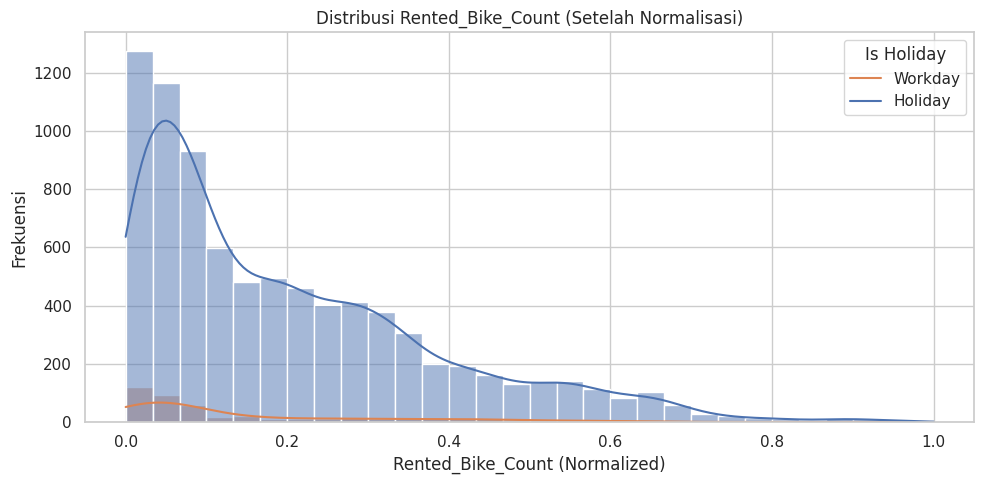

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_ind

# Buat salinan data agar data asli tidak terpengaruh
seoulbike_norm = seoulbike.copy()

# Normalisasi Min-Max untuk kolom Rented_Bike_Count
scaler = MinMaxScaler()
seoulbike_norm['Rented_Bike_Count'] = scaler.fit_transform(seoulbike[['Rented_Bike_Count']])

# Visualisasi distribusi setelah normalisasi
plt.figure(figsize=(10, 5))
sns.histplot(data=seoulbike_norm, x='Rented_Bike_Count', hue='IsHoliday', kde=True, bins=30)
plt.title('Distribusi Rented_Bike_Count (Setelah Normalisasi)')
plt.xlabel('Rented_Bike_Count (Normalized)')
plt.ylabel('Frekuensi')
plt.legend(title='Is Holiday', labels=['Workday', 'Holiday'])
plt.tight_layout()
plt.show()

In [27]:
# Pisahkan data ke dua grup: hari kerja vs hari libur
workday = seoulbike_norm[seoulbike_norm['IsHoliday'] == False]['Rented_Bike_Count']
holiday = seoulbike_norm[seoulbike_norm['IsHoliday'] == True]['Rented_Bike_Count']

# Lakukan independent t-test
t_stat, p_value = ttest_ind(workday, holiday, equal_var=False)

# Tampilkan hasil
print("🔹 A/B Testing - Seluruh Hari")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretasi hasil
alpha = 0.05
if p_value < alpha:
    print("❗ Reject H0: Ada perbedaan signifikan antara hari kerja dan hari libur.")
else:
    print("✅ Gagal menolak H0: Tidak ada perbedaan signifikan.")


🔹 A/B Testing - Seluruh Hari
T-Statistic: 7.597329134044753
P-Value: 1.5453403340261486e-13
❗ Reject H0: Ada perbedaan signifikan antara hari kerja dan hari libur.


### A/B Testing Tambahan

#### A/B Testing Berdasarkan JAM TERTENTU (contoh: 7–9 pagi)

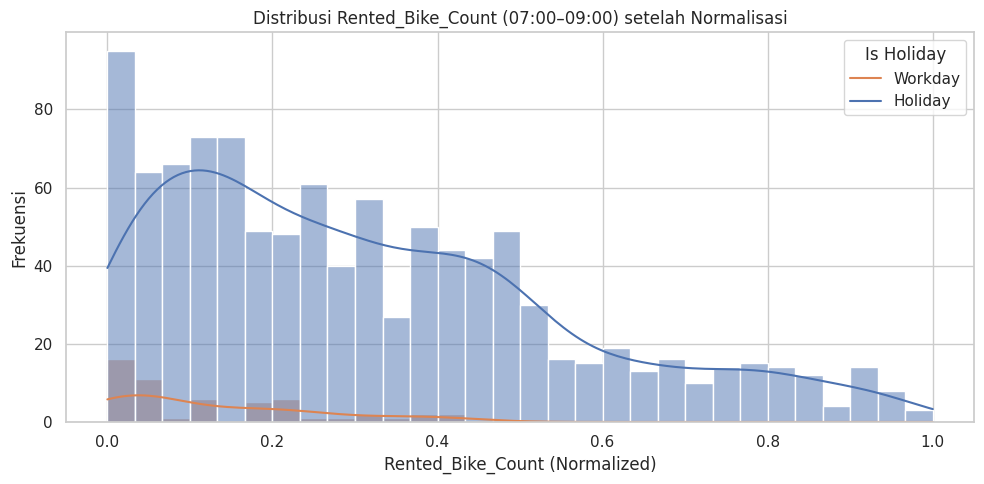

In [28]:
# Filter data pagi (07:00–09:00)
morning_df = seoulbike[seoulbike['Hour'].between(7, 9)].copy()

# Normalisasi Min-Max
scaler = MinMaxScaler()
morning_df['Rented_Bike_Count'] = scaler.fit_transform(morning_df[['Rented_Bike_Count']])

# Plot histogram distribusi data setelah normalisasi
plt.figure(figsize=(10, 5))
sns.histplot(data=morning_df, x='Rented_Bike_Count', hue='IsHoliday', kde=True, bins=30)
plt.title('Distribusi Rented_Bike_Count (07:00–09:00) setelah Normalisasi')
plt.xlabel('Rented_Bike_Count (Normalized)')
plt.ylabel('Frekuensi')
plt.legend(title='Is Holiday', labels=['Workday', 'Holiday'])
plt.tight_layout()
plt.show()

In [29]:
# Pisahkan grup kerja & libur
workday_morning = morning_df[morning_df['IsHoliday'] == False]['Rented_Bike_Count']
holiday_morning = morning_df[morning_df['IsHoliday'] == True]['Rented_Bike_Count']

# Uji t-test
t_stat_morning, p_value_morning = ttest_ind(workday_morning, holiday_morning, equal_var=False)

# Hasil uji statistik
print("🔹 A/B Testing - Pagi (07:00–09:00)")
print("T-Statistic:", t_stat_morning)
print("P-Value:", p_value_morning)
if p_value_morning < 0.05:
    print("✅ Perbedaan signifikan antara hari kerja dan hari libur di pagi hari.")
else:
    print("❌ Tidak ada perbedaan signifikan.")



🔹 A/B Testing - Pagi (07:00–09:00)
T-Statistic: 10.146237947505602
P-Value: 8.969766089442275e-16
✅ Perbedaan signifikan antara hari kerja dan hari libur di pagi hari.


Question:
Kalau kita ingin meningkatkan ketersediaan sepeda saat rush hour (jam 7–9 pagi di hari kerja), berapa banyak sepeda tambahan yang idealnya disediakan?

Ambil rata-rata jumlah rental jam 7–9 pagi di hari kerja

* Hitung jumlah sepeda yang tersedia saat ini (jika ada) atau estimasi target penambahan berdasarkan gap

* Simulasikan proyeksi kebutuhan tambahan, misalnya:

  * Tambah 10% dari rata-rata harian

  * Tambah jumlah unit untuk menghindari kehabisan (misalnya >90% utilisasi)

In [30]:
# Filter jam 7–9 pagi hari kerja
rush_hour_df = seoulbike[
    (seoulbike['Hour'].between(7, 9)) &
    (seoulbike['IsHoliday'] == False)
]

# Hitung rata-rata rental per jam
average_rentals = rush_hour_df.groupby('Hour')['Rented_Bike_Count'].mean()
peak_total = average_rentals.sum()

print("📈 Rata-rata total rental jam 7-9 pagi (hari kerja):", round(peak_total))

# Simulasi penambahan jika ingin memenuhi 110% dari permintaan
recommended_bikes = int(peak_total * 1.1)

print("✅ Rekomendasi jumlah sepeda tersedia (110% dari rata-rata):", recommended_bikes)
print("Tambahan sepeda ideal:", recommended_bikes - int(peak_total))


📈 Rata-rata total rental jam 7-9 pagi (hari kerja): 2336
✅ Rekomendasi jumlah sepeda tersedia (110% dari rata-rata): 2570
Tambahan sepeda ideal: 234


#### A/B Testing Berdasarkan MUSIM (Summer vs Winter)

📊 Uji Normalitas (Shapiro-Wilk Test)
Summer - Statistik: 0.9469, P-Value: 0.0000
Winter - Statistik: 0.9251, P-Value: 0.0000
❗ Summer: Data tidak normal.
❗ Winter: Data tidak normal.


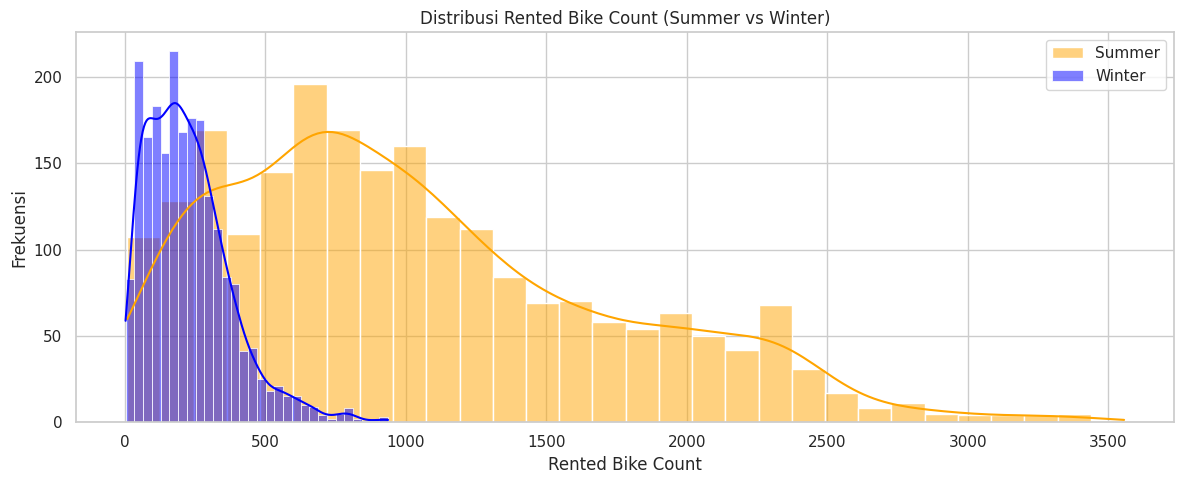


🔹 A/B Testing - Musim (Summer vs Winter)
T-Statistic: 53.7534610575521
P-Value: 0.0
✅ Perbedaan signifikan antara musim panas dan musim dingin.


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, shapiro

# Filter hanya data musim Summer dan Winter
season_df = seoulbike[seoulbike['Seasons'].isin(['Summer', 'Winter'])]

# Pisahkan berdasarkan musim
summer_rentals = season_df[season_df['Seasons'] == 'Summer']['Rented_Bike_Count']
winter_rentals = season_df[season_df['Seasons'] == 'Winter']['Rented_Bike_Count']

# --- UJI NORMALITAS ---
print("📊 Uji Normalitas (Shapiro-Wilk Test)")
stat_summer, p_summer = shapiro(summer_rentals)
stat_winter, p_winter = shapiro(winter_rentals)

print(f"Summer - Statistik: {stat_summer:.4f}, P-Value: {p_summer:.4f}")
print(f"Winter - Statistik: {stat_winter:.4f}, P-Value: {p_winter:.4f}")

if p_summer < 0.05:
    print("❗ Summer: Data tidak normal.")
else:
    print("✅ Summer: Data terdistribusi normal.")

if p_winter < 0.05:
    print("❗ Winter: Data tidak normal.")
else:
    print("✅ Winter: Data terdistribusi normal.")

# --- VISUALISASI DISTRIBUSI ---
plt.figure(figsize=(12, 5))
sns.histplot(summer_rentals, kde=True, color='orange', label='Summer', bins=30)
sns.histplot(winter_rentals, kde=True, color='blue', label='Winter', bins=30)
plt.title('Distribusi Rented Bike Count (Summer vs Winter)')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frekuensi')
plt.legend()
plt.tight_layout()
plt.show()

# --- UJI T-TEST ---
t_stat_season, p_value_season = ttest_ind(summer_rentals, winter_rentals, equal_var=False)

print("\n🔹 A/B Testing - Musim (Summer vs Winter)")
print("T-Statistic:", t_stat_season)
print("P-Value:", p_value_season)
if p_value_season < 0.05:
    print("✅ Perbedaan signifikan antara musim panas dan musim dingin.")
else:
    print("❌ Tidak ada perbedaan signifikan.")


#### A/B Testing Berdasarkan CUACA (Tanpa Hujan vs Hujan)

📊 Uji Normalitas (Shapiro-Wilk Test)
No Rain  - Statistik: 0.8923, P-Value: 0.0000
Rain     - Statistik: 0.5820, P-Value: 0.0000
❗ No Rain: Data tidak normal.
❗ Rain: Data tidak normal.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8232.
  res = hypotest_fun_out(*samples, **kwds)


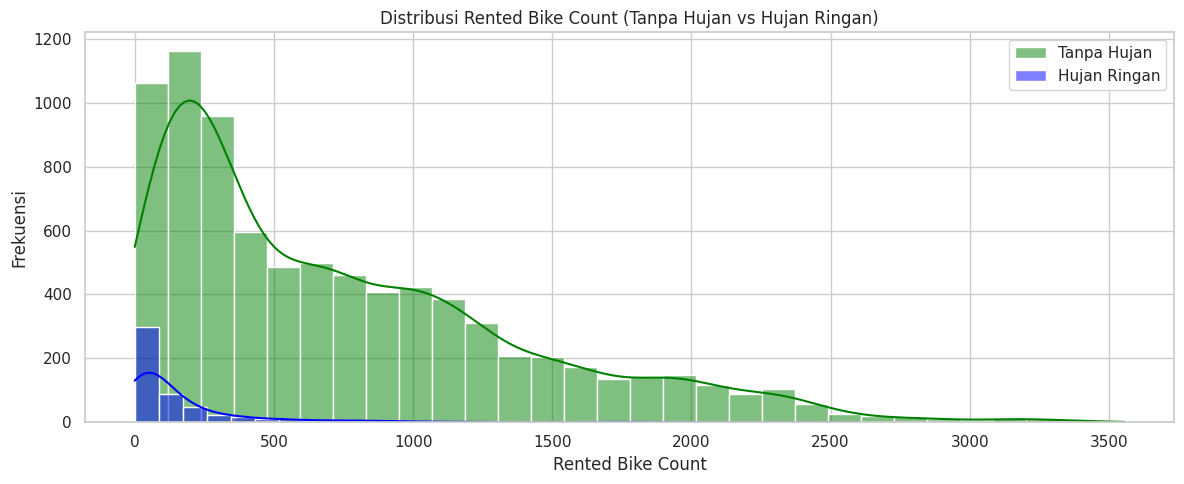


🔹 A/B Testing - Cuaca (Tanpa Hujan vs Hujan)
T-Statistic: 42.634954952616596
P-Value: 1.4272747203926303e-226
✅ Perbedaan signifikan antara hari hujan dan hari cerah.


In [32]:
# Filter hanya hujan ringan (< 20 mm)
rain_df = seoulbike[seoulbike['Rainfallmm'] < 20]

# Kelompokkan data: tanpa hujan vs hujan ringan
no_rain = rain_df[rain_df['Rainfallmm'] == 0]['Rented_Bike_Count']
rain = rain_df[rain_df['Rainfallmm'] > 0]['Rented_Bike_Count']

# --- UJI NORMALITAS ---
print("📊 Uji Normalitas (Shapiro-Wilk Test)")
stat_norain, p_norain = shapiro(no_rain)
stat_rain, p_rain = shapiro(rain)

print(f"No Rain  - Statistik: {stat_norain:.4f}, P-Value: {p_norain:.4f}")
print(f"Rain     - Statistik: {stat_rain:.4f}, P-Value: {p_rain:.4f}")

if p_norain < 0.05:
    print("❗ No Rain: Data tidak normal.")
else:
    print("✅ No Rain: Data terdistribusi normal.")

if p_rain < 0.05:
    print("❗ Rain: Data tidak normal.")
else:
    print("✅ Rain: Data terdistribusi normal.")

# --- VISUALISASI DISTRIBUSI ---
plt.figure(figsize=(12, 5))
sns.histplot(no_rain, kde=True, color='green', label='Tanpa Hujan', bins=30)
sns.histplot(rain, kde=True, color='blue', label='Hujan Ringan', bins=30)
plt.title('Distribusi Rented Bike Count (Tanpa Hujan vs Hujan Ringan)')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frekuensi')
plt.legend()
plt.tight_layout()
plt.show()

# --- UJI T-TEST ---
t_stat_rain, p_value_rain = ttest_ind(no_rain, rain, equal_var=False)

print("\n🔹 A/B Testing - Cuaca (Tanpa Hujan vs Hujan)")
print("T-Statistic:", t_stat_rain)
print("P-Value:", p_value_rain)
if p_value_rain < 0.05:
    print("✅ Perbedaan signifikan antara hari hujan dan hari cerah.")
else:
    print("❌ Tidak ada perbedaan signifikan.")
